In [1]:
from __future__ import print_function
import torch

In [2]:
# 초기화되지 않은 5x3 행렬
x = torch.empty(5, 3)
print(x)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.1686e-04, 1.6427e-07],
        [2.3050e-12, 7.1856e+22, 4.3605e+27],
        [2.5226e-18, 8.2231e+32, 1.8394e+25],
        [6.1963e-04, 1.0140e-08, 1.8530e+28]])


In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.4867, 0.0040, 0.8574],
        [0.1893, 0.6167, 0.3375],
        [0.6592, 0.8872, 0.1895],
        [0.9707, 0.0081, 0.4728],
        [0.0340, 0.9696, 0.6622]])


In [8]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)
x.size()

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


torch.Size([5, 3])

In [10]:
# 덧셈
x = torch.rand(5,3)
y = torch.rand(5,3)
print(torch.add(x, y))
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)
y.add_(x)
print(y)

tensor([[1.8758, 1.1217, 0.7320],
        [1.2511, 0.3969, 1.4272],
        [1.3171, 0.6067, 1.4530],
        [0.9926, 0.8165, 1.0354],
        [1.2956, 0.7298, 1.7869]])
tensor([[1.8758, 1.1217, 0.7320],
        [1.2511, 0.3969, 1.4272],
        [1.3171, 0.6067, 1.4530],
        [0.9926, 0.8165, 1.0354],
        [1.2956, 0.7298, 1.7869]])
tensor([[1.8758, 1.1217, 0.7320],
        [1.2511, 0.3969, 1.4272],
        [1.3171, 0.6067, 1.4530],
        [0.9926, 0.8165, 1.0354],
        [1.2956, 0.7298, 1.7869]])


In [5]:
# numpy를 tensor로 변환
import numpy as np
import torch
a = np.ones(5)
c = np.ones(5)
b = torch.from_numpy(a)
np.add(a,2,out =a)
print(a)
print(b)
print(c)

[3. 3. 3. 3. 3.]
tensor([3., 3., 3., 3., 3.], dtype=torch.float64)
[1. 1. 1. 1. 1.]


In [14]:
# CUDA 사용
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x,device=device)
    x = x.to(device)
    z = x+y
    print(z)
    print(z.to("cpu",torch.double))

tensor([[1.9739, 1.9903, 1.5238],
        [1.4233, 1.0521, 1.8992],
        [1.3907, 1.3759, 1.9717],
        [1.6150, 1.5954, 1.9446],
        [1.8745, 1.0729, 1.8308]], device='cuda:0')
tensor([[1.9739, 1.9903, 1.5238],
        [1.4233, 1.0521, 1.8992],
        [1.3907, 1.3759, 1.9717],
        [1.6150, 1.5954, 1.9446],
        [1.8745, 1.0729, 1.8308]], dtype=torch.float64)


In [9]:
import torch
x = torch.ones(2,2,requires_grad = True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [10]:
y = x +2 
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)


In [3]:
print(y.grad_fn)

In [13]:
z = y*y*3
out = z.mean()
print(z,out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>) tensor(27., grad_fn=<MeanBackward1>)


In [5]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [14]:
out.backward()

In [17]:
print(x.grad)
print(x)
print(out)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor(27., grad_fn=<MeanBackward1>)


In [18]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ 792.4568,  907.1465, -979.4745], grad_fn=<MulBackward>)


In [19]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([ 102.4000, 1024.0000,    0.1024])


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 입력 이미지 채널 1개, 출력 채널 6개, 3x3의 정사각 컨볼루션 행렬
        # 컨볼루션 커널 정의
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # 아핀(affine) 연산: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6은 이미지 차원에 해당
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # (2, 2) 크기 윈도우에 대해 맥스 풀링(max pooling)
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 크기가 제곱수라면 하나의 숫자만을 특정
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # 배치 차원을 제외한 모든 차원
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)
x = 
net.forward(x)
# print(net.requires_grad)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


NameError: name 'x' is not defined

In [21]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1의 .weight

10
torch.Size([6, 1, 3, 3])


In [22]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0474,  0.0667, -0.0649, -0.0798, -0.0856, -0.0807, -0.0096,  0.0576,
          0.0933, -0.0835]], grad_fn=<ThAddmmBackward>)


In [23]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [24]:
output = net(input)
target = torch.randn(10)  # 예시를 위한 임의의 정답
target = target.view(1, -1)  # 출력과 같은 shape로 만듦
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.2986, grad_fn=<MseLossBackward>)


In [25]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [26]:
net.zero_grad()     # 모든 매개변수의 변화도 버퍼를 0으로 만듦

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0011,  0.0042,  0.0038,  0.0028, -0.0007,  0.0025])


In [27]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [28]:
import torch.optim as optim

# Optimizer를 생성합니다.
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 학습 과정(training loop)에서는 다음과 같습니다:
optimizer.zero_grad()   # 변화도 버퍼를 0으로
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # 업데이트 진행

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


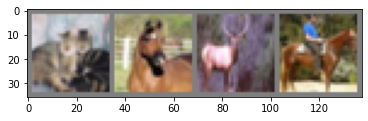

  cat horse  deer horse


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [21]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 128, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(128, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [31]:
Net().parameters

<bound method Module.parameters of Net(
  (conv1): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device)

cuda:0


In [23]:
net.to(device)
# inputs, labels = data[0].to(device), data[1].to(device)

Net(
  (conv1): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [24]:
for epoch in range(2):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data[0].to(device), data[1].to(device)

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.304
[1,  6000] loss: 2.304
[1,  8000] loss: 2.305
[1, 10000] loss: 2.305
[1, 12000] loss: 2.304
[2,  2000] loss: 2.305
[2,  4000] loss: 2.304
[2,  6000] loss: 2.304
[2,  8000] loss: 2.305
[2, 10000] loss: 2.304
[2, 12000] loss: 2.304
Finished Training


In [25]:
import os
PATH =os.getenv('HOME')+'/aiffel/cifarnet.pth'
# PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f1dc6a0acb0>
Traceback (most recent call last):
  File "/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/multiprocessing/reduction

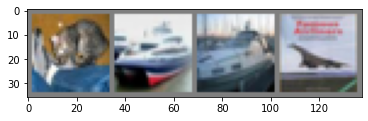

GroundTruth:    cat  ship  ship plane


In [26]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [27]:
net = Net() 
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [28]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   deer  deer  deer  deer


In [29]:
# torch.max(outputs,1)
predicted

tensor([4, 4, 4, 4])

In [30]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %
